# **Twitter Sentiment Analysis**

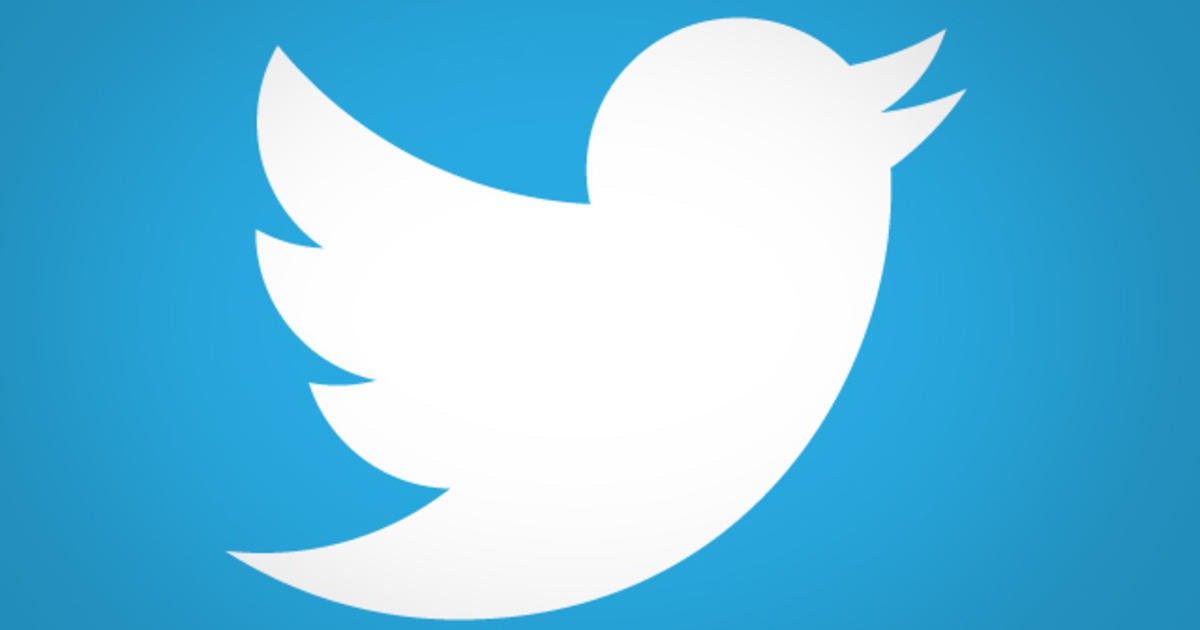**

### **Importing Libararies and Loading the Dataset**

In [229]:
import numpy as np
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [230]:
train=pd.read_csv('/content/twitter_training.csv',header=None,encoding='ISO-8859-1')
train.columns=['id','social media','target','text']
val=pd.read_csv('/content/twitter_validation.csv',header=None,encoding='ISO-8859-1')
val.columns=["id","social media","target","text"]
train

,id,social media,target,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [231]:
val

,id,social media,target,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


### **Conacatinating the test and train data**

In [232]:
df=pd.concat([train,val],axis=0,ignore_index=True)
df

,id,social media,target,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
75677,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
75678,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
75679,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
75680,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [233]:
df.head()

,id,social media,target,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [234]:
df.tail()

,id,social media,target,text
75677,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
75678,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
75679,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
75680,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.
75681,6960,johnson&johnson,Neutral,Johnson & Johnson to stop selling talc baby po...


In [235]:
df.shape

(75682, 4)

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75682 entries, 0 to 75681
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            75682 non-null  int64 
 1   social media  75682 non-null  object
 2   target        75682 non-null  object
 3   text          74996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


### **Data Cleaning**

In [237]:
df.duplicated().sum()

3217

In [238]:
df.drop_duplicates(inplace=True)

In [239]:
df.isna().sum()

id                0
social media      0
target            0
text            326
dtype: int64

In [240]:
df.dropna(axis=0,inplace=True)

In [241]:
df.isna().sum()

id              0
social media    0
target          0
text            0
dtype: int64

In [242]:
df.shape

(72139, 4)

In [243]:
df['social media'].value_counts()

social media
TomClancysRainbowSix                 2349
CallOfDuty                           2333
Verizon                              2330
MaddenNFL                            2326
Microsoft                            2317
WorldOfCraft                         2317
LeagueOfLegends                      2314
TomClancysGhostRecon                 2305
ApexLegends                          2305
NBA2K                                2304
Facebook                             2300
johnson&johnson                      2274
Amazon                               2270
Battlefield                          2269
CallOfDutyBlackopsColdWar            2256
FIFA                                 2256
Dota2                                2240
Hearthstone                          2237
Overwatch                            2231
Borderlands                          2222
HomeDepot                            2221
GrandTheftAuto(GTA)                  2218
Xbox(Xseries)                        2216
Nvidia               

In [244]:
df['target'].value_counts()

target
Negative      21790
Positive      19846
Neutral       17879
Irrelevant    12624
Name: count, dtype: int64

### **Visualizations**

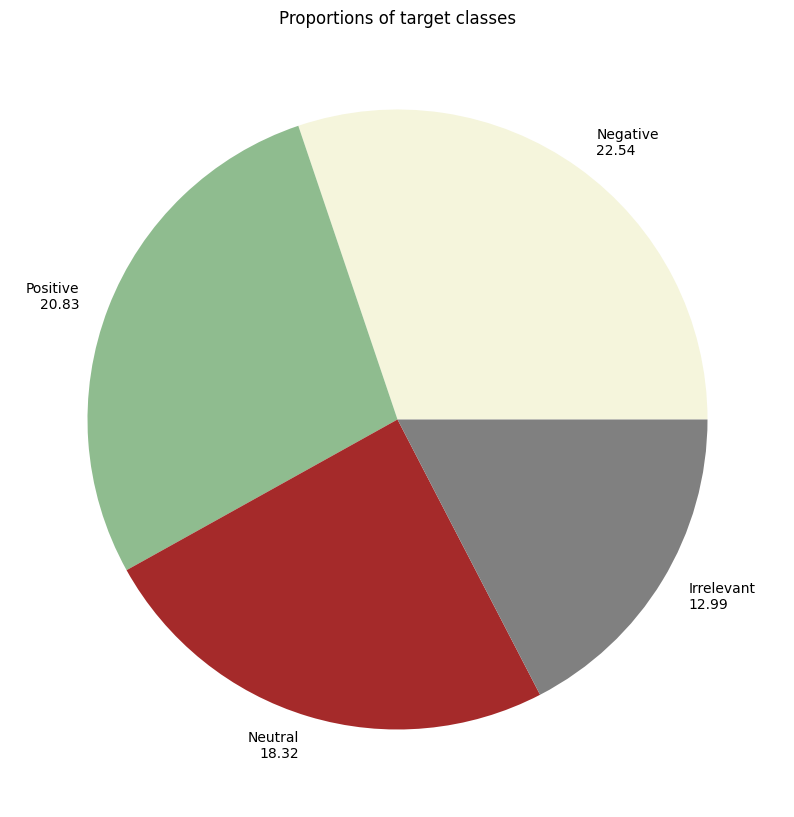

In [245]:
target_count=train['target'].value_counts()
plt.figure(figsize=(10,12))
plt.pie(target_count, labels=[f'{i}\n{round(target_count[i]/len(val), 2)}' for i in target_count.index],
        colors=['#F5F5DC', '#8FBC8F', '#A52A2A', 'gray'])
plt.title('Proportions of target classes')
plt.show()

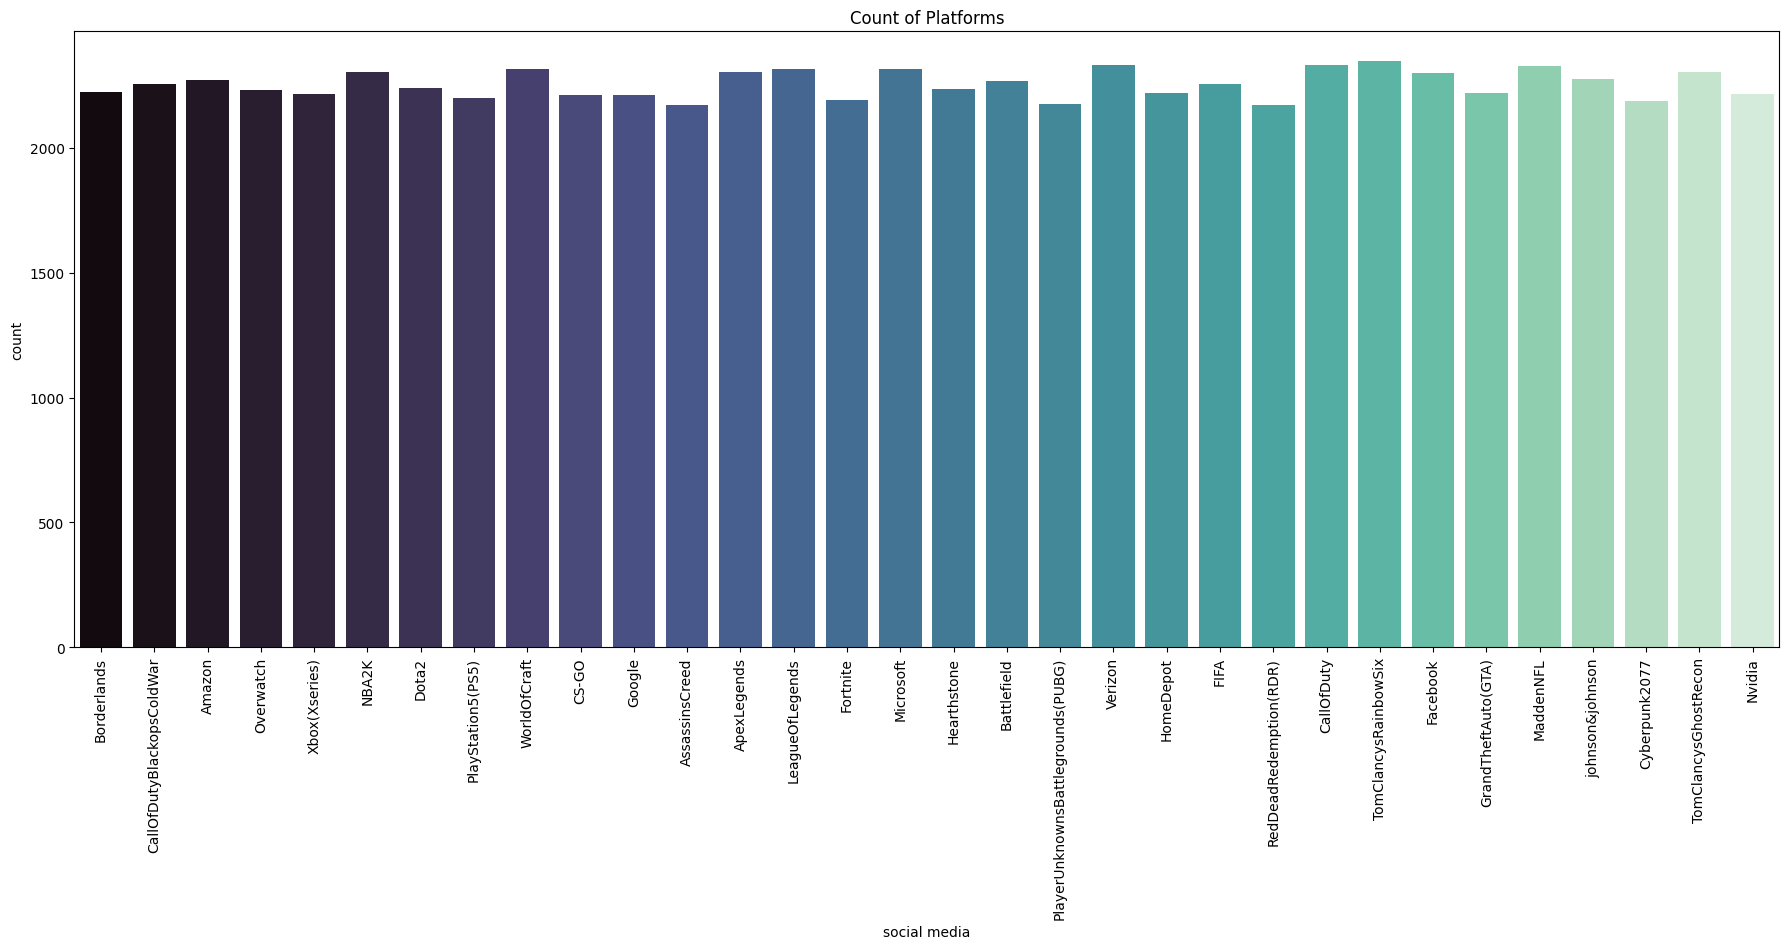

In [246]:
plt.figure(figsize=(22,8))
sns.countplot(x='social media',data=df,hue='social media',palette='mako')
plt.xticks(rotation=90)
plt.title("Count of Platforms")
plt.show()

### **Preprocessing**

In [247]:
val['target'].unique()

array(['Irrelevant', 'Neutral', 'Negative', 'Positive'], dtype=object)

In [248]:
df.drop(df.index[df['target']=='Irrelevant'],axis=0,inplace=True)
df

,id,social media,target,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
75666,1373,Battlefield,Negative,I have noticed streamers I watch who are now p...
75667,10588,RedDeadRedemption(RDR),Neutral,@6th__man playing red dead redemption-\n\nâO...
75670,7516,LeagueOfLegends,Neutral,â¥ï¸ Suikoden 2\n1ï¸â£ Alex Kidd in Miracl...
75671,5708,HomeDepot,Positive,Thank you to Matching funds Home Depot RW paym...


In [249]:
df.reset_index(drop=True,inplace=True)
df

,id,social media,target,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
59510,1373,Battlefield,Negative,I have noticed streamers I watch who are now p...
59511,10588,RedDeadRedemption(RDR),Neutral,@6th__man playing red dead redemption-\n\nâO...
59512,7516,LeagueOfLegends,Neutral,â¥ï¸ Suikoden 2\n1ï¸â£ Alex Kidd in Miracl...
59513,5708,HomeDepot,Positive,Thank you to Matching funds Home Depot RW paym...


In [250]:
df.drop(['id','social media'],axis=1,inplace=True)
df

,target,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...
...,...,...
59510,Negative,I have noticed streamers I watch who are now p...
59511,Neutral,@6th__man playing red dead redemption-\n\nâO...
59512,Neutral,â¥ï¸ Suikoden 2\n1ï¸â£ Alex Kidd in Miracl...
59513,Positive,Thank you to Matching funds Home Depot RW paym...


In [251]:
df['target']=df['target'].map({'Positive':1,'Neutral':0,'Negative':-1})
df

,target,text
0,1,im getting on borderlands and i will murder yo...
1,1,I am coming to the borders and I will kill you...
2,1,im getting on borderlands and i will kill you ...
3,1,im coming on borderlands and i will murder you...
4,1,im getting on borderlands 2 and i will murder ...
...,...,...
59510,-1,I have noticed streamers I watch who are now p...
59511,0,@6th__man playing red dead redemption-\n\nâO...
59512,0,â¥ï¸ Suikoden 2\n1ï¸â£ Alex Kidd in Miracl...
59513,1,Thank you to Matching funds Home Depot RW paym...


In [252]:
df.dtypes

target     int64
text      object
dtype: object

In [253]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [254]:
tweets=df.text
tweets

0        im getting on borderlands and i will murder yo...
1        I am coming to the borders and I will kill you...
2        im getting on borderlands and i will kill you ...
3        im coming on borderlands and i will murder you...
4        im getting on borderlands 2 and i will murder ...
                               ...                        
59510    I have noticed streamers I watch who are now p...
59511    @6th__man playing red dead redemption-\n\nâO...
59512    â¥ï¸ Suikoden 2\n1ï¸â£ Alex Kidd in Miracl...
59513    Thank you to Matching funds Home Depot RW paym...
59514    Late night stream with the boys! Come watch so...
Name: text, Length: 59515, dtype: object

### **Tokenizing**

In [255]:
from nltk import TweetTokenizer
tk=TweetTokenizer()
tweets=tweets.apply(lambda x:tk.tokenize(x)).apply(lambda x: ' '.join(x))
tweets

0        im getting on borderlands and i will murder yo...
1        I am coming to the borders and I will kill you...
2        im getting on borderlands and i will kill you ...
3        im coming on borderlands and i will murder you...
4        im getting on borderlands 2 and i will murder ...
                               ...                        
59510    I have noticed streamers I watch who are now p...
59511    @6th__man playing red dead redemption - â   ...
59512    â  ¥ ï ¸  Suikoden 2 1ï ¸  â  £ Alex Kidd ...
59513    Thank you to Matching funds Home Depot RW paym...
59514    Late night stream with the boys ! Come watch s...
Name: text, Length: 59515, dtype: object

### **Removing special characters**

In [256]:
tweets=tweets.str.replace('[^a-zA-Z0-9]+',' ')
tweets

0        im getting on borderlands and i will murder yo...
1        I am coming to the borders and I will kill you...
2        im getting on borderlands and i will kill you ...
3        im coming on borderlands and i will murder you...
4        im getting on borderlands 2 and i will murder ...
                               ...                        
59510    I have noticed streamers I watch who are now p...
59511    @6th__man playing red dead redemption - â   ...
59512    â  ¥ ï ¸  Suikoden 2 1ï ¸  â  £ Alex Kidd ...
59513    Thank you to Matching funds Home Depot RW paym...
59514    Late night stream with the boys ! Come watch s...
Name: text, Length: 59515, dtype: object

In [257]:
from os.path import join
from nltk.tokenize import word_tokenize
tweets=tweets.apply(lambda x: ' '.join([w for  w in word_tokenize(x) if len(w)>3]))
tweets

0                          getting borderlands will murder
1                                 coming borders will kill
2                            getting borderlands will kill
3                           coming borderlands will murder
4                          getting borderlands will murder
                               ...                        
59510    have noticed streamers watch playing other gam...
59511    6th__man playing dead redemption shit bear sta...
59512    Suikoden Alex Kidd Miracle World Persona Soul ...
59513    Thank Matching funds Home Depot payment 215545...
59514    Late night stream with boys Come watch some wa...
Name: text, Length: 59515, dtype: object

### **Stemming**

In [258]:
from nltk.stem import SnowballStemmer
stemm=SnowballStemmer('english')
tweets=tweets.apply(lambda x: ' '.join([stemm.stem(i.lower()) for i in tk.tokenize(x)]))
tweets

0                               get borderland will murder
1                                    come border will kill
2                                 get borderland will kill
3                              come borderland will murder
4                               get borderland will murder
                               ...                        
59510    have notic streamer watch play other game othe...
59511    6th__man play dead redempt shit bear start run...
59512    suikoden alex kidd miracl world persona soul c...
59513    thank match fund home depot payment 215545 you...
59514    late night stream with boy come watch some war...
Name: text, Length: 59515, dtype: object

### **Stop words Removal**

In [259]:
from nltk.corpus import stopwords
sw=stopwords.words('english')
tweets=tweets.apply(lambda x:[i for i in tk.tokenize(x) if i not in sw]).apply(lambda x:' '.join(x))
tweets

0                                    get borderland murder
1                                         come border kill
2                                      get borderland kill
3                                   come borderland murder
4                                    get borderland murder
                               ...                        
59510    notic streamer watch play game battlefield rel...
59511    6th__man play dead redempt shit bear start run...
59512    suikoden alex kidd miracl world persona soul c...
59513    thank match fund home depot payment 215545 gen...
59514    late night stream boy come watch warzon run st...
Name: text, Length: 59515, dtype: object

### **Vectoriation**

In [260]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
x=vec.fit_transform(tweets)

In [261]:
x.shape

(59515, 22214)

In [262]:
print(x)

  (0, 13377)	0.7455250725259347
  (0, 4024)	0.47008485886918944
  (0, 8830)	0.4724537984788926
  (1, 11422)	0.4938372661014934
  (1, 4022)	0.7466964445290405
  (1, 5260)	0.4456110123606601
  (2, 11422)	0.6159607261746161
  (2, 4024)	0.5556405576058558
  (2, 8830)	0.5584406455066583
  (3, 5260)	0.470721184202356
  (3, 13377)	0.7463088558365858
  (3, 4024)	0.470579067153457
  (4, 13377)	0.7455250725259347
  (4, 4024)	0.47008485886918944
  (4, 8830)	0.4724537984788926
  (5, 13377)	0.7455250725259347
  (5, 4024)	0.47008485886918944
  (5, 8830)	0.4724537984788926
  (6, 13096)	0.3310367971628781
  (6, 5252)	0.09903905489259704
  (6, 20068)	0.12215691227081826
  (6, 14975)	0.12087833202616696
  (6, 7276)	0.16976925626045167
  (6, 12377)	0.16518811102505632
  (6, 5670)	0.31357275580449206
  :	:
  (59513, 14743)	0.22868016192841067
  (59513, 21129)	0.20766192110242648
  (59513, 12606)	0.17090487191498274
  (59513, 18780)	0.15216565400678403
  (59513, 9998)	0.13392623563157766
  (59513, 14358)	0

In [263]:
y=df['target'].values
y

array([1, 1, 1, ..., 0, 1, 0])

### **Splitting into Train and test Data**

In [264]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

<41660x22214 sparse matrix of type '<class 'numpy.float64'>'
	with 394386 stored elements in Compressed Sparse Row format>

In [265]:
x_test

<17855x22214 sparse matrix of type '<class 'numpy.float64'>'
	with 169504 stored elements in Compressed Sparse Row format>

In [266]:
y_train

array([ 1, -1, -1, ...,  1,  0,  1])

In [267]:
y_test

array([0, 1, 1, ..., 0, 0, 1])

### **Model Creation and Performance Evaluation**

In [279]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay,classification_report
knn_model=KNeighborsClassifier(n_neighbors=7)
log_model=LogisticRegression(C=1, solver="liblinear",max_iter=200)
Nb_model=MultinomialNB()
dt_model=DecisionTreeClassifier()
rf_model=RandomForestClassifier(n_estimators=100,random_state=42)
model_names=["KNeighborsClassifier","LogisticRegression","GaussianNB","DecisionTreeClassifier","RandomForestClassifier"]
a_models=[knn_model,log_model,Nb_model,dt_model,rf_model]
lst_score=[]

In [280]:
for i in a_models:
  print("Model:",i)
  print('-'*150)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  mat=confusion_matrix(y_test,y_pred)
  score=accuracy_score(y_test,y_pred)
  lst_score.append(score)
  print("Accuracy score:",score)
  print("Model Evaluation Result:")
  print(classification_report(y_test,y_pred))
  print("="*150)

Model: KNeighborsClassifier(n_neighbors=7)
------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy score: 0.8692243069168301
Model Evaluation Result:
              precision    recall  f1-score   support

          -1       0.92      0.89      0.91      6587
           0       0.96      0.77      0.85      5302
           1       0.77      0.93      0.84      5966

    accuracy                           0.87     17855
   macro avg       0.88      0.86      0.87     17855
weighted avg       0.88      0.87      0.87     17855

Model: LogisticRegression(C=1, max_iter=200, solver='liblinear')
------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy score: 0.7763651638196584
Model Evaluation Result:
              precision    recall  f1-score   support

          -1       0.79      0.82 

### **KNeighboursClassifier** and **RandomForestClassifier** performs with the Best Accuracy